# Mushroom Classifier

The goal: to develop a machine learning model that can identify if a mushroom is safe to eat.

The method: Downlaod to types of images, edible mushrooms and poisonous mushrooms. This will make the model capable of identifying if a mushroom is edible or poisonous. 

## Setup

In [1]:
%matplotlib inline
from fastai.vision.all import *
from pathlib import Path

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
!pip install kaggle

     |████████████████████████████████| 58 kB 9.0 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 12.2 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=6109869bae9d099562b7fea5f530aae1242bfce33d330a437f14a0d29b5ccc59
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


## Get the data

In [3]:
!pip install bing-image-downloader
from bing_image_downloader import downloader

downloader.download("poisonous mushroom", limit=150, output_dir='mushrooms', adult_filter_off=True, force_replace=False, timeout=5)
downloader.download("edible mushroom", limit=150, output_dir='mushrooms', adult_filter_off=True, force_replace=False, timeout=5)


path = Path('mushrooms/poisonous mushroom')
path.rename('mushrooms/poisonous')
path = Path('mushrooms/edible mushroom')
path.rename('mushrooms/edible')


[%] Downloading Images to /notebooks/dat255/mushrooms/poisonous mushroom


[!!]Indexing page: 1

[%] Indexed 9 Images on Page 1.


[%] Downloading Image #1 from http://inhabitat.com/wp-content/blogs.dir/1/files/2014/09/Chanterelle-Wikipedia-537x403.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://ultimate-mushroom.com/uploads/posts/2021-03/1616076999_gyromitra-gigas-1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://lastoneeating.files.wordpress.com/2010/05/morel1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://allthatsinteresting.com/wordpress/wp-content/uploads/2014/03/bizarre-mushroom-morchella-esculenta.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://oregondiscovery.com/wp-content/uploads/2018/10/ChanterelleIdentification-2.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://1.bp.blogspot.com/-Dv7HJPEumGw/UiTHXvW1DfI/AAAAAAAAFFU/cAMzmatkzLM/s1600/poisonous+pigskin+puffball.jpg
[%] File Downloaded !

[%] Dow

[%] File Downloaded !

[%] Downloading Image #48 from http://cdn0.wideopenspaces.com/wp-content/uploads/2016/04/RealFalseMorels.jpg
[%] File Downloaded !

[%] Downloading Image #49 from https://mushroomswnc.weebly.com/uploads/1/4/7/1/14718200/1447533.jpg?0
[!] Issue getting: https://mushroomswnc.weebly.com/uploads/1/4/7/1/14718200/1447533.jpg?0
[!] Error:: <urlopen error timed out>


[!!]Indexing page: 9

[%] Indexed 2 Images on Page 9.


[%] Downloading Image #49 from https://www.canr.msu.edu/contentAsset/image/6d76acc2-c97f-4ec7-9b3a-e768cf88977d/fileAsset/filter/Resize,Jpeg/resize_w/720/jpeg_q/80
[%] File Downloaded !

[%] Downloading Image #50 from https://melmagazine.com/wp-content/uploads/2020/08/Getting_High_Real_Life_Mario_Mushrooms.jpg
[%] File Downloaded !



[!!]Indexing page: 10

[%] Indexed 1 Images on Page 10.


[%] Downloading Image #51 from https://www.petmd.com/sites/default/files/mushroom-poisoning-dogs.jpg
[%] File Downloaded !



[!!]Indexing page: 11

[%] Indexed 9

[%] File Downloaded !

[%] Downloading Image #84 from https://ultimate-mushroom.com/uploads/posts/2020-11/1606427435_tubifera-ferruginosa-3.jpg
[%] File Downloaded !

[%] Downloading Image #85 from https://ultimate-mushroom.com/uploads/posts/2021-03/1616076945_gyromitra-gigas-3.jpg
[%] File Downloaded !

[%] Downloading Image #86 from https://practicalselfreliance.com/wp-content/uploads/2018/07/Chanterelle-Forked-Gills.jpg
[%] File Downloaded !

[%] Downloading Image #87 from https://www.sunnysports.com/blog/wp-content/uploads/2013/11/7395571824_4072a80fc0_k-920x690.jpg
[!] Issue getting: https://www.sunnysports.com/blog/wp-content/uploads/2013/11/7395571824_4072a80fc0_k-920x690.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #87 from https://www.mushroom-appreciation.com/image-files/morel-mushroom-identification.jpg
[%] File Downloaded !

[%] Downloading Image #88 from https://littlevillagemag.com/wp-content/uploads/2015/08/botany-chanterelles-640x480.jpg
[%] File Down

[Error]Invalid image, not saving http://www.quartoknows.com/blog/quartohomes/wp-content/uploads/sites/2/2015/10/morels_yellow_morel_mushrooms_Mushroom_Hunter_wild_mushrooms.png

[!] Issue getting: http://www.quartoknows.com/blog/quartohomes/wp-content/uploads/sites/2/2015/10/morels_yellow_morel_mushrooms_Mushroom_Hunter_wild_mushrooms.png
[!] Error:: Invalid image, not saving http://www.quartoknows.com/blog/quartohomes/wp-content/uploads/sites/2/2015/10/morels_yellow_morel_mushrooms_Mushroom_Hunter_wild_mushrooms.png

[%] Downloading Image #126 from http://ww3.hdnux.com/photos/16/17/76/3735478/5/920x920.jpg
[%] File Downloaded !

[%] Downloading Image #127 from http://all-that-is-interesting.com/wordpress/wp-content/uploads/2014/03/bizarre-mushroom-amanita-muscaria.jpg
[%] File Downloaded !

[%] Downloading Image #128 from https://www.mushroom-appreciation.com/image-files/false-morel-mushroom.jpg
[%] File Downloaded !

[%] Downloading Image #129 from https://allthatsinteresting.com/wor

[%] File Downloaded !



[!!]Indexing page: 3

[%] Indexed 8 Images on Page 3.


[%] Downloading Image #19 from https://ultimate-mushroom.com/uploads/posts/2020-10/1602916114_verpa-bohemica-1.jpg
[%] File Downloaded !

[%] Downloading Image #20 from https://www.mushroom-appreciation.com/image-files/morel-mushroom-identification.jpg
[%] File Downloaded !

[%] Downloading Image #21 from https://i.pinimg.com/originals/44/b2/4a/44b24a77adb3e145c84b54a882225a68.jpg
[%] File Downloaded !

[%] Downloading Image #22 from https://i.etsystatic.com/18376711/r/il/52dc40/1658998980/il_794xN.1658998980_5air.jpg
[%] File Downloaded !

[%] Downloading Image #23 from https://i.pinimg.com/originals/c9/9c/5d/c99c5d0bdce9554c38518335d2b0d545.jpg
[%] File Downloaded !

[%] Downloading Image #24 from http://3.bp.blogspot.com/_lfXUHoxAbaI/TEWiVuoJQzI/AAAAAAAAfBg/zPdpidp7_rQ/s1600/IMGP7250.JPG
[%] File Downloaded !

[%] Downloading Image #25 from http://i1.wp.com/www.mushroomdiary.co.uk/wp-content/uploads/201

[%] File Downloaded !

[%] Downloading Image #63 from https://www.mushroom-appreciation.com/image-files/morel-mushroom-identification.jpg
[%] File Downloaded !

[%] Downloading Image #64 from https://ultimate-mushroom.com/uploads/posts/2020-10/1602916114_verpa-bohemica-1.jpg
[%] File Downloaded !

[%] Downloading Image #65 from http://i1.wp.com/www.mushroomdiary.co.uk/wp-content/uploads/2012/07/false-chanterelle-identification.jpg?fit=670%2C300
[%] File Downloaded !

[%] Downloading Image #66 from https://i.pinimg.com/originals/c9/9c/5d/c99c5d0bdce9554c38518335d2b0d545.jpg
[%] File Downloaded !

[%] Downloading Image #67 from https://i.pinimg.com/originals/44/b2/4a/44b24a77adb3e145c84b54a882225a68.jpg
[%] File Downloaded !

[%] Downloading Image #68 from https://i.etsystatic.com/18376711/r/il/52dc40/1658998980/il_794xN.1658998980_5air.jpg
[%] File Downloaded !

[%] Downloading Image #69 from https://files.shroomery.org/files/13-30/481156052-IMG_20130725_153401_402.jpg
[%] File Download

[%] File Downloaded !

[%] Downloading Image #114 from http://americanmushrooms.com/graphics/Scleroderma_citrinum_01a.jpg
[%] File Downloaded !



[!!]Indexing page: 18

[%] Indexed 9 Images on Page 18.


[%] Downloading Image #115 from https://wildmushroomhunting.org/uploads/monthly_2020_10/20201024_174449.jpg.41ab51576888a21a9800f9fd2484593d.jpg
[%] File Downloaded !

[%] Downloading Image #116 from https://www.montananaturalist.org/wp-content/uploads/Morchella_elata_group_38336-photo-by-Johannes-Harnisch-1024x768.jpg
[%] File Downloaded !

[%] Downloading Image #117 from https://allthatsinteresting.com/wordpress/wp-content/uploads/2014/03/bizarre-mushroom-brain.jpg
[%] File Downloaded !

[%] Downloading Image #118 from https://grocycle.com/wp-content/uploads/2020/03/How-To-Identify-Puffball-Mushrooms-2-1024x512.jpg
[%] File Downloaded !

[%] Downloading Image #119 from http://www.offthegridnews.com/wp-content/uploads/2015/11/black-trumpet-wikipedia.jpg
[%] File Downloaded !

[%] Dow

In [4]:
DATA=Path('../dat255/mushrooms')

The folder 'mushrooms' has 300 images of edible and poisonous mushrooms, as expected.

In [5]:
fns=get_image_files(DATA)
fns

(#300) [Path('../dat255/mushrooms/poisonous/Image_118.jpg'),Path('../dat255/mushrooms/poisonous/Image_32.jpg'),Path('../dat255/mushrooms/poisonous/Image_100.jpg'),Path('../dat255/mushrooms/poisonous/Image_93.jpg'),Path('../dat255/mushrooms/poisonous/Image_61.jpg'),Path('../dat255/mushrooms/poisonous/Image_30.jpg'),Path('../dat255/mushrooms/poisonous/Image_43.jpg'),Path('../dat255/mushrooms/poisonous/Image_143.jpg'),Path('../dat255/mushrooms/poisonous/Image_73.jpg'),Path('../dat255/mushrooms/poisonous/Image_29.jpg')...]

Checking for corrupted images:

In [6]:
failed=verify_images(fns)
failed

(#0) []

I get that no images are corrupted, which sounds too good to be true...

## Basic exploration

In [7]:
DATA.ls()

(#2) [Path('../dat255/mushrooms/poisonous'),Path('../dat255/mushrooms/edible')]

Let us look at a poisonous mushroom.

In [8]:
test_img=(DATA/'poisonous').ls()[5]

In [9]:
test_img

Path('../dat255/mushrooms/poisonous/Image_30.jpg')

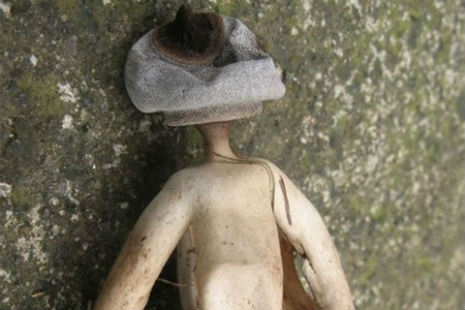

In [10]:
img=load_image(test_img)
img

In [11]:
img.shape

(310, 465)

We then take a look at an edible mushroom.

In [12]:
test_img=(DATA/'edible').ls()[5]
test_img

Path('../dat255/mushrooms/edible/Image_43.jpg')

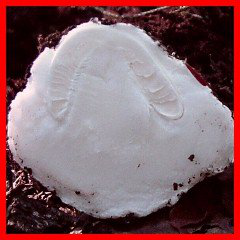

In [13]:
img=load_image(test_img)
img

In [14]:
img.shape

(240, 240)

## From Data to DataLoaders

In [15]:
mushroom_dl = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls=mushroom_dl.dataloaders(DATA)

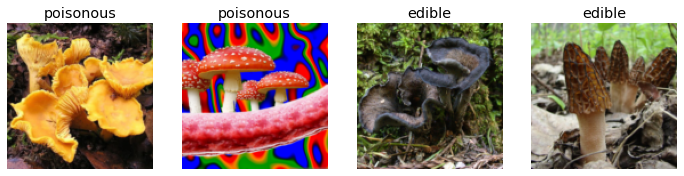

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

Replace 'Resize' with 'RandomResizeCrop'. We do this to train the neural network with examples of images where the objects are in slightly different places and slightly different sizes. 

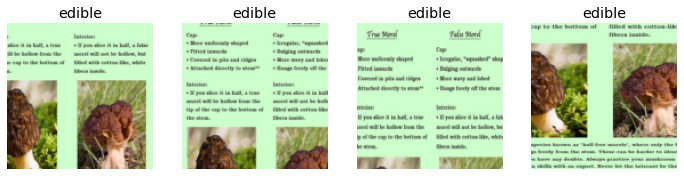

In [18]:
mushroom_dl = mushroom_dl.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = mushroom_dl.dataloaders(DATA)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Data augmentation: creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data.

Could not do one pass in your dataloader, there is something wrong in it


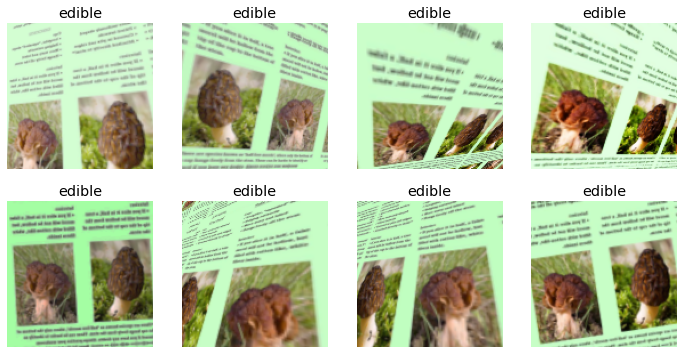

In [19]:
mushroom_dl = mushroom_dl.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = mushroom_dl.dataloaders(DATA)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Train the model

In [20]:
mushroom_dl = mushroom_dl.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = mushroom_dl.dataloaders(DATA)

We create our learner and fine-tune it in the usual way:

In [21]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.387062,3.251796,0.516667,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.774861,1.169148,0.516667,00:07
1,0.676769,0.472825,0.233333,00:06
2,0.590676,0.324723,0.083333,00:07
3,0.547524,0.367402,0.100000,00:07


We create a confusion matrix:

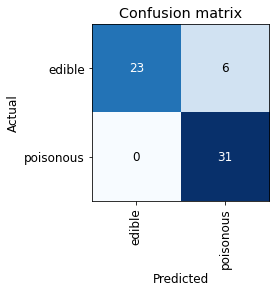

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

From the confusion matrix we see that our model correctly classifies 27 edible mushroom and wrongly classifies 3 mushrooms as edible (which is actually poisonous). The model correctly classifies 28 poisonous mushrooms, but wrongly classifies 2 mushrooms as poisonous. 

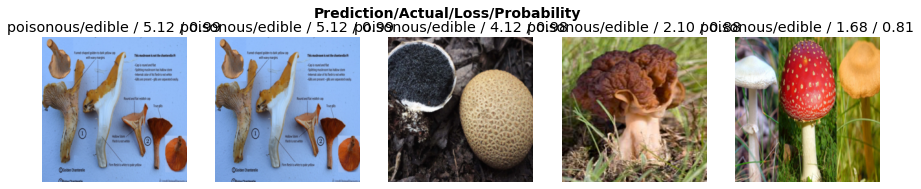

In [23]:
interp.plot_top_losses(5, nrows=1)

## Data cleaning

The 'ImageClassifierCleaner' lets you choose a category and the training versus validation set and view the highest-loss images (in order), along with the menus to allow images to be selected for removal or relabeling.

In [24]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

Deleting the images set to delete. 

In [25]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

## Creating a Notebook App from the Model

Saving both the architecture and the trained parameters with 'export'.

In [26]:
learn.export()

In [27]:
DATA = Path()
DATA.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
learn_inf = load_learner(DATA/'export.pkl')

Create a file upload widget.

In [29]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [54]:
img = PILImage.create(btn_upload.data[-1])

In [55]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

We can now get our predictions, and use 'Label' to display them.

In [56]:
pred,pred_idx,probs = learn_inf.predict(img)

In [57]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: poisonous; Probability: 0.9651')

A button to do the classification:

In [58]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

Click event handler:

In [59]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

Put them in a vertical box:

In [60]:
btn_upload = widgets.FileUpload()

In [61]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

## Turning the Notebook into a Real App

In [62]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.7 MB 23.2 MB/s eta 0:00:01
     |████████████████████████████████| 557 kB 67.4 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 395 kB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 44.8 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 13.9 MB/s eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbdev 1.1.23 requires nbconvert<6, but you have nbconvert 6.4.1 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.3.1 OK
